## Libraries 
4 different library is used in Homework 1. Zoo and Lubridate were used in work related to time. In addition, "xlsx" is used to read xlsx file of EVDS file. Lastly, ggplot is used for visualizations.

In [27]:
library(zoo)
library(xlsx)
library(lubridate)
library(ggplot2)

# Task 1 (Datasets)

3 datasets were selected for Homework 1. EVDS is the first dataset including weekly dollar exhange rate since 2016. In addition, information of which week is that was added for each year.

In [28]:
EVDS=read.xlsx("EVDS.xlsx",sheetIndex=1, header=TRUE)
names(EVDS)
EVDS <- EVDS[-c(255, 256), ]
EVDS$Tarih=dmy(EVDS$Tarih)
EVDS$Week=week(EVDS$Tarih)
EVDS$month_year <-format(EVDS$Tarih,'%Y-%m')
summary(EVDS)
str(EVDS)

[1] "Tarih"              "TP.DK.USD.A.EF.YTL"

     Tarih            TP.DK.USD.A.EF.YTL      Week        month_year       
 Min.   :2016-01-01   Min.   :2.826      Min.   : 1.00   Length:254        
 1st Qu.:2017-03-18   1st Qu.:3.527      1st Qu.:13.00   Class :character  
 Median :2018-06-04   Median :4.583      Median :26.00   Mode  :character  
 Mean   :2018-06-04   Mean   :4.736      Mean   :25.98                     
 3rd Qu.:2019-08-21   3rd Qu.:5.837      3rd Qu.:38.75                     
 Max.   :2020-11-06   Max.   :8.401      Max.   :53.00                     

'data.frame':	254 obs. of  4 variables:
 $ Tarih             : Date, format: "2016-01-01" "2016-01-08" ...
 $ TP.DK.USD.A.EF.YTL: num  2.91 2.97 3.01 3.04 3 ...
 $ Week              : num  1 2 3 4 5 6 7 8 9 10 ...
 $ month_year        : chr  "2016-01" "2016-01" "2016-01" "2016-01" ...


unemployement.csv is included information related to the Percentage of Unemployment for Turkey. In the dataset, monthly values for unemployment percentage is existing. The last 2 rows in the dataset were null so these were removed first. In addition, "Tarih" column's format was changed to Date type.

In [30]:
unemployement_df=read.csv("unemployement.csv", stringsAsFactors = FALSE) 
unemployement_df <- unemployement_df[-c(157, 158), ]
unemployement_df$Tarih=as.Date(as.yearmon(unemployement_df$Tarih))
summary(unemployement_df)
str(unemployement_df)

     Tarih              enflasyon         issizlik    
 Min.   :2006-01-01   Min.   : 3.990   Min.   : 7.30  
 1st Qu.:2009-03-24   1st Qu.: 7.372   1st Qu.: 9.10  
 Median :2012-06-16   Median : 8.700   Median :10.10  
 Mean   :2012-06-16   Mean   : 9.093   Mean   :10.17  
 3rd Qu.:2015-09-08   3rd Qu.:10.168   3rd Qu.:10.80  
 Max.   :2018-12-01   Max.   :25.240   Max.   :14.80  

'data.frame':	156 obs. of  3 variables:
 $ Tarih    : Date, format: "2006-01-01" "2006-02-01" ...
 $ enflasyon: num  7.93 8.15 8.16 8.83 9.86 ...
 $ issizlik : num  10.8 10.9 10 9.1 8 8.1 8.2 8.6 8.4 8.4 ...


The last dataset is related to covid-19. Covid came up in recent time period. So there are limited information related to covid. In covid19-Turkey dataset, the number of daily coronavirus cases is existing for 3th to 7th month of 2020. 

In [8]:
covid_df=read.csv("covid19-Turkey.csv")
covid_df$date=as.Date(covid_df$date)
covid_df$day=day(covid_df$date)
covid_df$month_year <-format(covid_df$date,'%Y-%m')
summary(covid_df)
str(covid_df)

      date              totalTests        totalCases      totalDeaths  
 Min.   :2020-03-11   Min.   :      0   Min.   :     1   Min.   :   0  
 1st Qu.:2020-04-14   1st Qu.: 469194   1st Qu.: 68322   1st Qu.:1489  
 Median :2020-05-19   Median :1685936   Median :152101   Median :4210  
 Mean   :2020-05-19   Mean   :1857456   Mean   :129517   Mean   :3369  
 3rd Qu.:2020-06-23   3rd Qu.:3043006   3rd Qu.:190538   3rd Qu.:5007  
 Max.   :2020-07-28   Max.   :4665383   Max.   :227982   Max.   :5645  
 totalIntensiveCare totalIntubated   totalRecovered     dailyTests   
 Min.   :   0.0     Min.   :   0.0   Min.   :     0   Min.   :    0  
 1st Qu.: 683.8     1st Qu.: 307.5   1st Qu.:  5455   1st Qu.:24822  
 Median :1022.0     Median : 393.0   Median :113441   Median :37288  
 Mean   : 993.4     Mean   : 478.3   Mean   : 96835   Mean   :33267  
 3rd Qu.:1260.8     3rd Qu.: 674.8   3rd Qu.:163194   3rd Qu.:43320  
 Max.   :1922.0     Max.   :1087.0   Max.   :211561   Max.   :57829  
   dai

'data.frame':	140 obs. of  13 variables:
 $ date              : Date, format: "2020-03-11" "2020-03-12" ...
 $ totalTests        : int  0 0 0 0 0 0 8002 10017 11998 15624 ...
 $ totalCases        : int  1 1 5 6 18 47 98 191 359 670 ...
 $ totalDeaths       : int  0 0 0 0 1 1 2 3 4 9 ...
 $ totalIntensiveCare: int  0 0 0 0 0 0 0 0 0 0 ...
 $ totalIntubated    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ totalRecovered    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ dailyTests        : int  0 0 0 0 0 0 0 2015 1981 3656 ...
 $ dailyCases        : int  1 0 4 1 12 29 51 93 168 311 ...
 $ dailyDeaths       : int  0 0 0 0 1 0 1 2 1 5 ...
 $ dailyRecovered    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ day               : int  11 12 13 14 15 16 17 18 19 20 ...
 $ month_year        : chr  "2020-03" "2020-03" "2020-03" "2020-03" ...


# Task 2 (Histogram of Measures)

## Dollar Exchange Rate Histogram

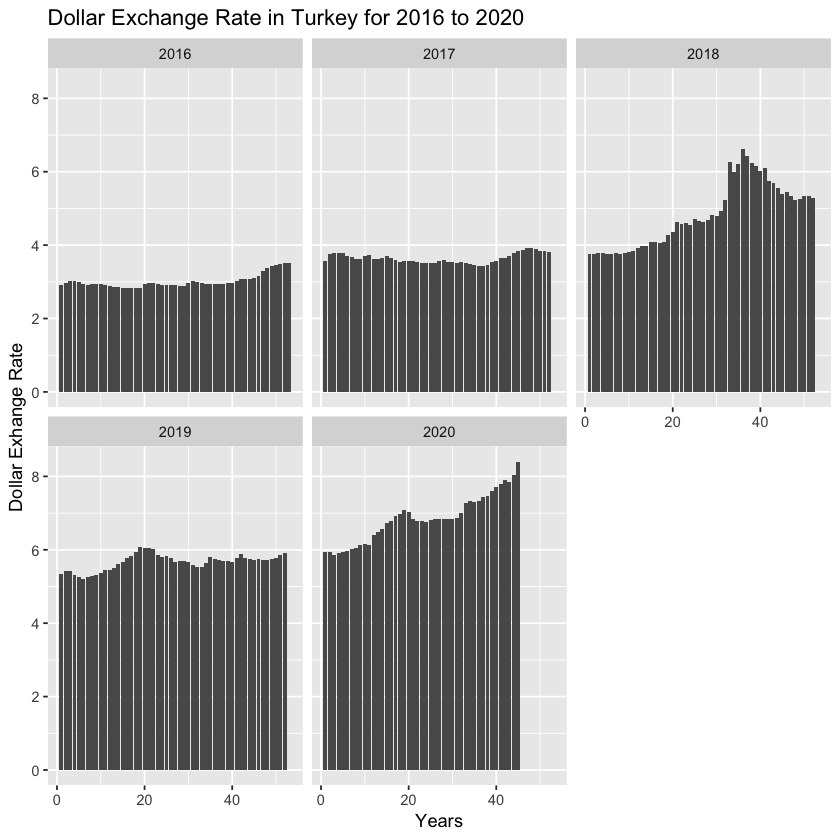

In [41]:
ggplot(EVDS,aes(x=Week,y=TP.DK.USD.A.EF.YTL))+ geom_bar(stat='identity')+
  facet_wrap(~year(Tarih))+
  xlab("Years") + ylab("Dollar Exhange Rate")+ ggtitle("Dollar Exchange Rate in Turkey for 2016 to 2020")

In general, there is an increase in the Dollar exchange rate over years. Also, the dollar's value has fluctuated in 2018. There was a peak in nearly the 35s week of 2018, but the value of this peak was reached in 2020.

## Percentage of Unemployment Histogram

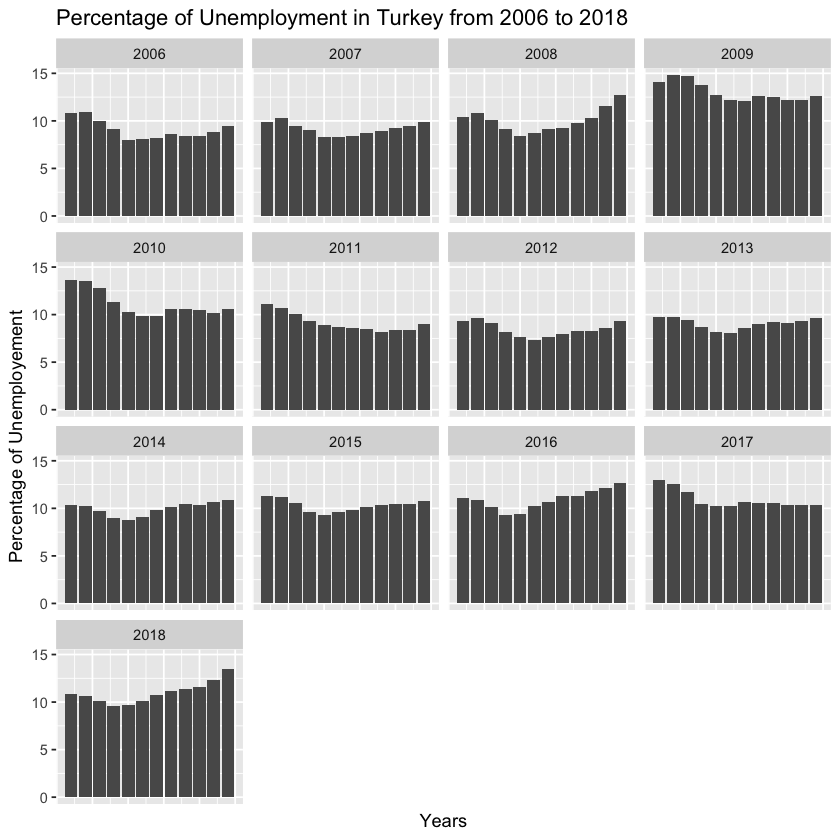

In [39]:
ggplot(unemployement_df,aes(x=month(Tarih),y=issizlik))+ geom_bar(stat='identity')+ 
  facet_wrap(~year(Tarih))+
  theme(legend.position = "none",
        axis.ticks.x = element_blank(),
        axis.text.x = element_blank())+
  xlab("Years") + ylab("Percentage of Unemployement")+ ggtitle("Percentage of Unemployment in Turkey from 2006 to 2018")

It can be said that there is a general pattern for the unemployment rate of Turkey. The lowest unemployment rate is achieved towards the middle of the years. In addition, the unemployment rate can be affected for different reasons. For example, there is an increase in late 2008 and early 2009, which caused by the 2008 economic crisis. However, it is hard to say significantly change over the years.

## Number of Covid cases Histogram

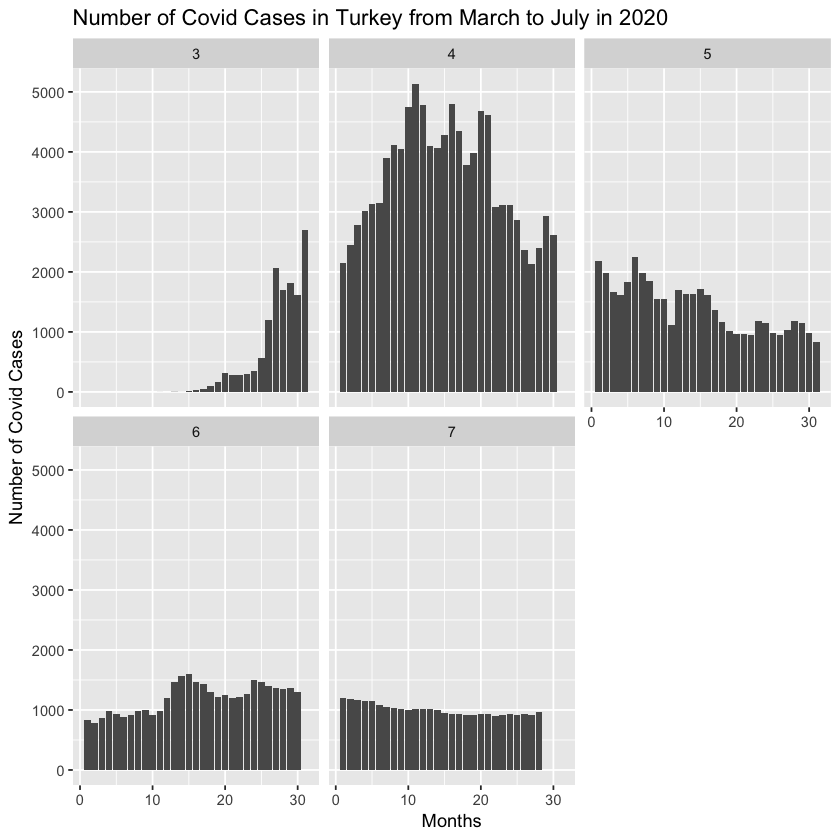

In [37]:
ggplot(covid_df,aes(x=day,y=dailyCases))+ geom_bar(stat='identity')+ 
  facet_wrap(~month(date))+
  xlab("Months") + ylab("Number of Covid Cases")+ ggtitle("Number of Covid Cases in Turkey from March to July in 2020")

The first covid case appeared in Turkey in mid of March 2020. The peak of the cases was reached in April. After the first wave of viruses, the daily number of covid cases approached a thousand. So, there is a change between the months, but a similar number of cases achieved in the last months.

# Task 3 (Boxplot for searches & datasets)
## "Dolar" search for Dollar Exchange Rate in Turkey


In [43]:
dolar_sr=read.csv("dolar_search.csv")
str(dolar_sr)
dolar_sr$Date=ymd(dolar_sr$Date)
dolar_sr$month_year <-format(dolar_sr$Date,'%Y-%m')
dolar_sr$Week=week(dolar_sr$Date)

'data.frame':	252 obs. of  2 variables:
 $ Date  : Factor w/ 252 levels "2016-01-03","2016-01-10",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Search: int  3 3 2 3 3 3 3 2 3 3 ...


"Dolar" means dollar in Turkey. So "dolar" can be a good keyword for measure. Date of dataset for "dolar" search is similar to Dollar Exchange Rate.  

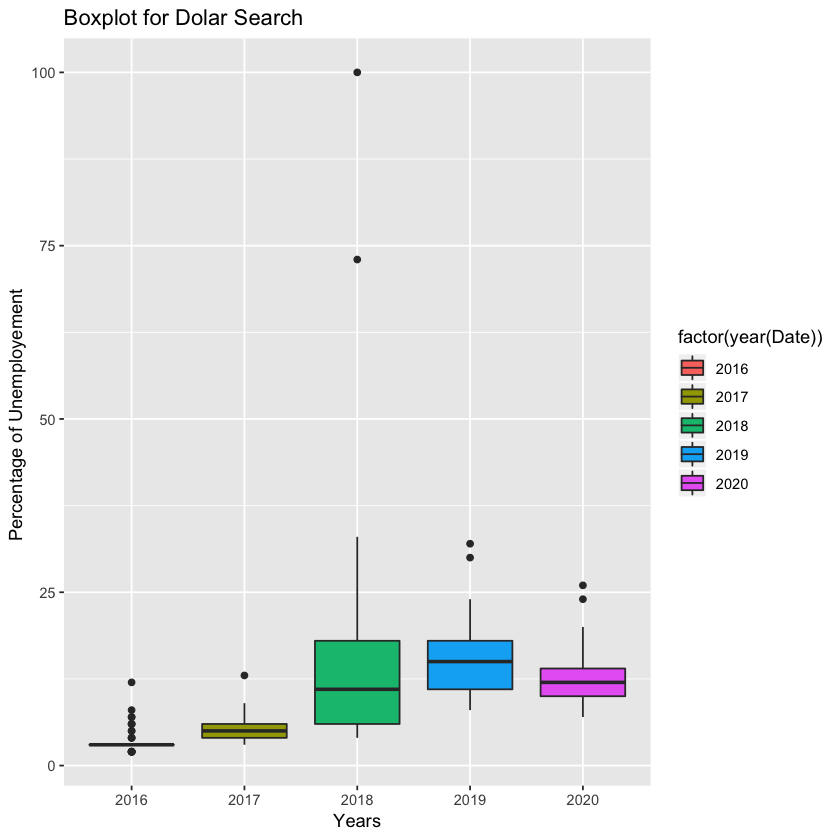

In [61]:
ggplot(dolar_sr,aes(x=factor(year(Date)),y=Search))+ geom_boxplot(aes(fill=factor(year(Date))))+ 
  xlab("Years") + ylab("Percentage of Unemployement ")+ ggtitle("Boxplot for Dolar Search")

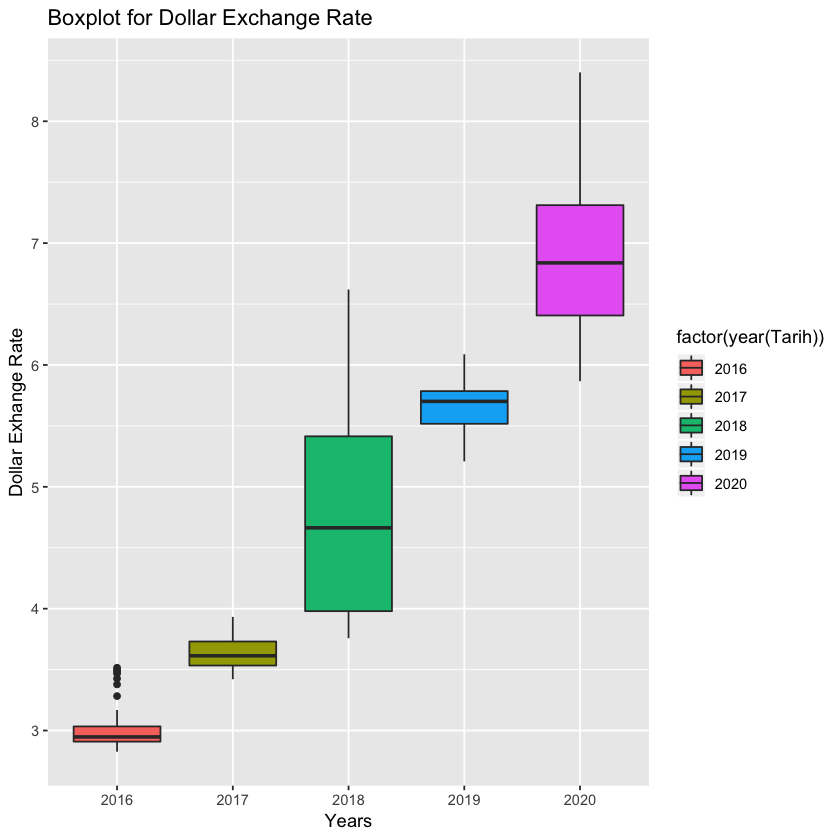

In [63]:
ggplot(EVDS,aes(x=factor(year(Tarih)),y=TP.DK.USD.A.EF.YTL))+ geom_boxplot(aes(fill=factor(year(Tarih))))+ 
  xlab("Years") + ylab("Dollar Exhange Rate")+ ggtitle("Boxplot for Dollar Exchange Rate")

The biggest percentage change in Dollar Exchange Rate occured in 2018, which also could have been affected people attention related to dollar. So, number of search for "dolar" varied in 2018 because of this changes. After this flactuation, Dollar Exchange Rate became more critical for people. So, there is an increase trend in "dolar" search as Dollar Exchange Rate. However, "dolar" search in 2020 little decreased from previous year, which can be caused from priority of people like Corona(health problems).

In [47]:
unemployement_sr=read.csv("is_search.csv")
str(unemployement_sr)
unemployement_sr$Date=as.Date(as.yearmon(unemployement_sr$Date))

'data.frame':	156 obs. of  2 variables:
 $ Date  : Factor w/ 156 levels "2006-01","2006-02",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Search: int  67 57 62 50 52 74 71 47 62 57 ...


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Number of Search for (is ilanı)' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Number of Search for (is ilanı)' in 'mbcsToSbcs': dot substituted for <b1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Number of Search for (is ilanı)' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Number of Search for (is ilanı)' in 'mbcsToSbcs': dot substituted for <b1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Boxplot for (is ilanı) Search' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion fai

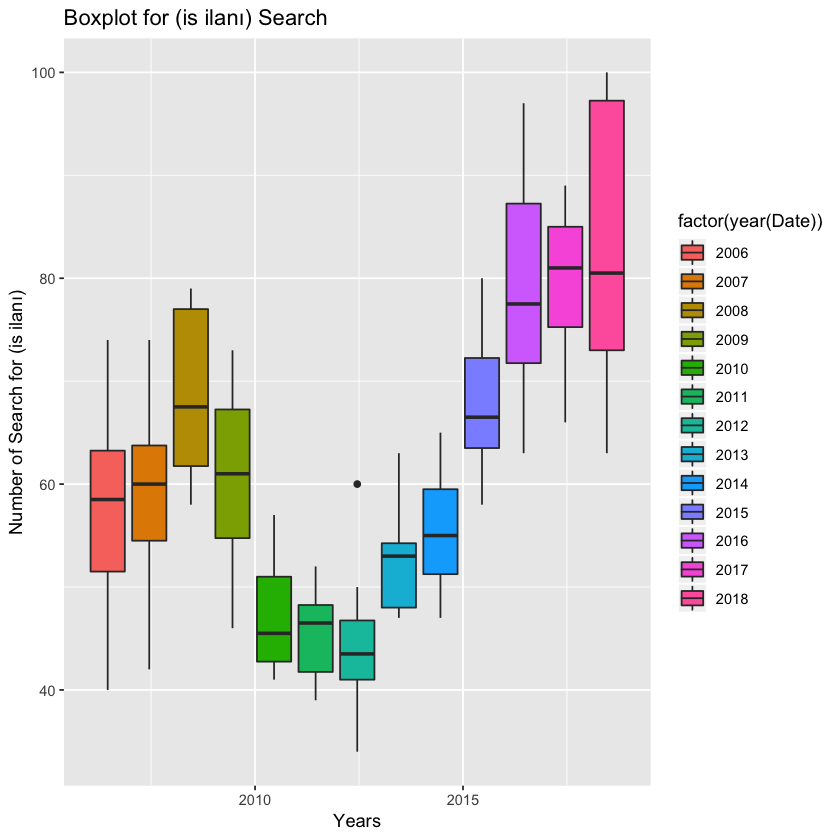

In [52]:
ggplot(unemployement_sr,aes(x=Date,y=Search,group=year(Date)))+ geom_boxplot(aes(fill=factor(year(Date))))+ 
  xlab("Years") + ylab("Number of Search for (is ilanı)")+ ggtitle("Boxplot for (is ilanı) Search")

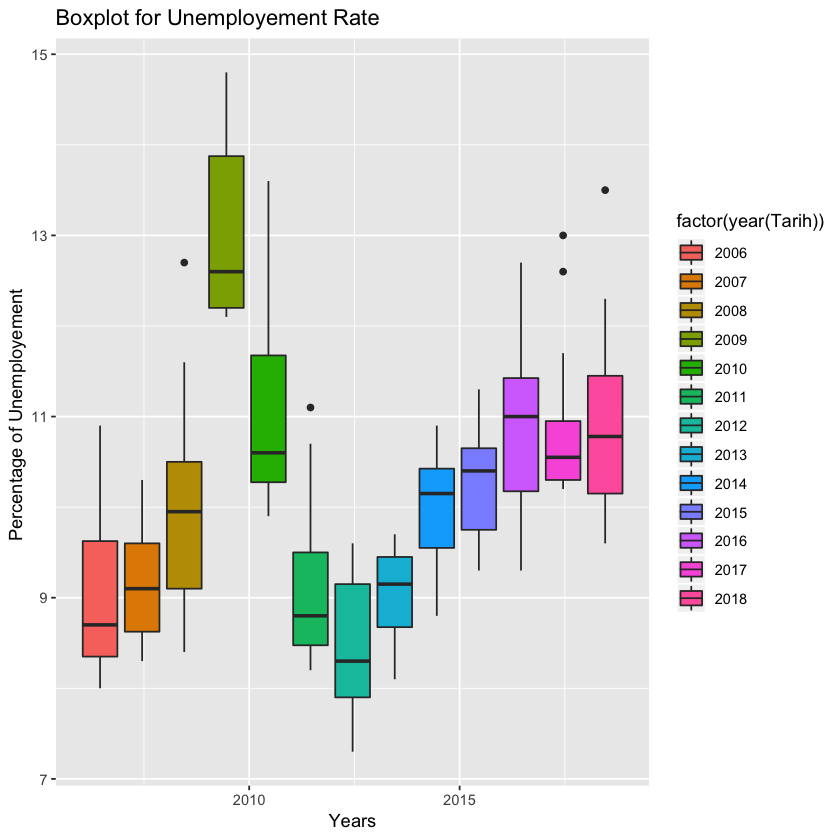

In [17]:
ggplot(unemployement_df,aes(x=Tarih,y=issizlik,group=year(Tarih)))+ geom_boxplot(aes(fill=factor(year(Tarih))))+ 
  xlab("Years") + ylab("Percentage of Unemployement ")+ ggtitle("Boxplot for Unemployement Rate")

The keyword for unemployment was determined as "iş". Increase and decrease in the unemployment rate and "iş" search have similarities. In addition, it can be said that the value of the unemployment rate did not change too much in the same year, but the number of searches changed dramatically between the months. Because of the Turkey's situation, it can be said that there is an upward trend in "job posting" search in general.

'data.frame':	140 obs. of  2 variables:
 $ Date  : Factor w/ 140 levels "2020-03-11","2020-03-12",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Search: int  54 100 89 77 74 86 81 77 75 75 ...


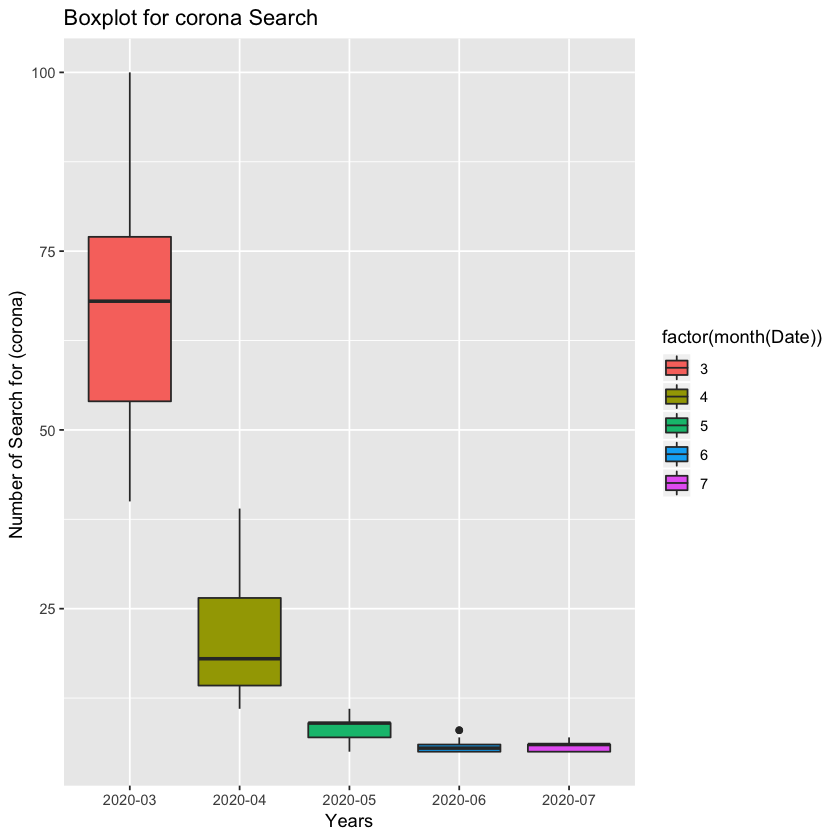

In [54]:
corona_sr=read.csv("Corona_search.csv")
str(corona_sr)
corona_sr$Date=ymd(corona_sr$Date)
corona_sr$month_year <-format(corona_sr$Date,'%Y-%m')
ggplot(corona_sr,aes(x=month_year,y=Search))+ geom_boxplot(aes(fill=factor(month(Date))))+ 
  xlab("Years") + ylab("Number of Search for (corona) ")+ ggtitle("Boxplot for corona Search")

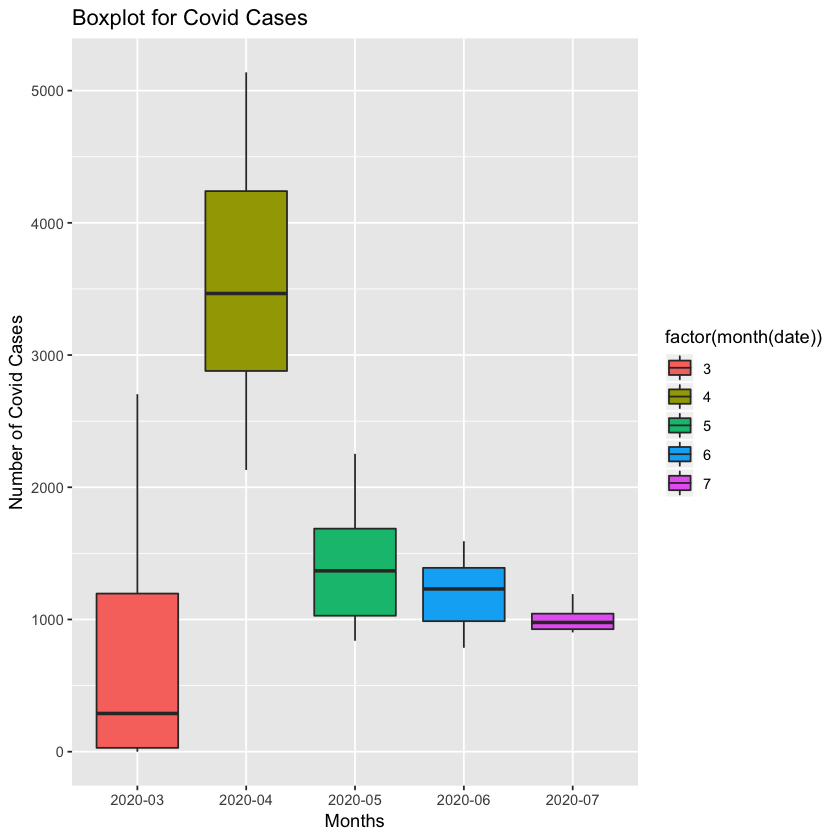

In [49]:
ggplot(covid_df,aes(x=month_year,y=dailyCases))+ geom_boxplot(aes(fill=factor(month(date))))+ 
  xlab("Months") + ylab("Number of Covid Cases")+ ggtitle("Boxplot for Covid Cases")

Lasty, keyword for Covid dataset was determined as "corona". Covid-19 was a mystry for people and this situation can be understood by looking the number of "corona" search. Indeed, this situation is a socialogical result of human. In addition, number of search for "corona" may be decreased by reduction in number of cases and becoming more familiar to covid-19. In general, covid is too new for humanity and it is hard to find a trend in "corona" search. However, it can be said that there is a decrease trend in "corona" search by just looking this 5 months.